In [1]:
%%time
import malaya

CPU times: user 6.54 s, sys: 1.51 s, total: 8.06 s
Wall time: 12.2 s


In [2]:
string = 'Benda yg SALAH ni, jgn lah didebatkan. Yg SALAH xkan jadi betul. Ingat tu. Mcm mana kesat sekalipun org sampaikan mesej, dan memang benda tu salah, diam je. Xyah nk tunjuk kau open sangat nk tegur cara org lain berdakwah. '
another_string = 'bodoh, dah la gay, sokong lgbt lagi, memang tak guna'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return classes more than 0.5 probability. **Default is False.**

## Load multinomial model

In [3]:
model = malaya.toxic.multinomial()

In [4]:
model.predict(string)

[]

In [5]:
model.predict(string,get_proba=True)

{'toxic': 0.012484205667806636,
 'severe_toxic': 3.40611049184067e-05,
 'obscene': 0.0024767674127827524,
 'threat': 7.315819729905254e-06,
 'insult': 0.0014764693032968909,
 'identity_hate': 3.486130941396132e-05}

In [6]:
model.predict(another_string)

[]

In [7]:
model.predict(another_string,get_proba=True)

{'toxic': 0.2124575765672004,
 'severe_toxic': 0.005042271594199945,
 'obscene': 0.06367370000210923,
 'threat': 0.0012906879267883594,
 'insult': 0.0578030070686466,
 'identity_hate': 0.007978673797459115}

In [8]:
model.predict_batch([string,another_string])

[[], []]

In [9]:
model.predict_batch([string,another_string],get_proba=True)

[{'toxic': 0.012484205667806636,
  'severe_toxic': 3.40611049184067e-05,
  'obscene': 0.0024767674127827524,
  'threat': 7.315819729905254e-06,
  'insult': 0.0014764693032968909,
  'identity_hate': 3.486130941396132e-05},
 {'toxic': 0.2124575765672004,
  'severe_toxic': 0.005042271594199945,
  'obscene': 0.06367370000210923,
  'threat': 0.0012906879267883594,
  'insult': 0.0578030070686466,
  'identity_hate': 0.007978673797459115}]

## List available Transformer models

In [10]:
malaya.toxic.available_transformer_model()

{'bert': ['base', 'small'], 'xlnet': ['base'], 'albert': ['base']}

## Load BERT model

In [3]:
model = malaya.toxic.transformer(model = 'bert', size = 'base')

W1018 00:50:39.522170 4377699776 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:68: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W1018 00:50:39.528988 4377699776 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:69: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.

W1018 00:50:46.064629 4377699776 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:64: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



#### Predict single string

In [14]:
model.predict(string, get_proba=True)

{'toxic': 0.7668859,
 'severe_toxic': 0.005910158,
 'obscene': 0.9025006,
 'threat': 0.00033624057,
 'insult': 0.017683616,
 'identity_hate': 0.0017774565}

#### Predict batch of strings

In [4]:
model.predict_batch([string,another_string],get_proba=True)

[{'toxic': 0.9515474,
  'severe_toxic': 0.005410731,
  'obscene': 0.79223156,
  'threat': 0.0001553595,
  'insult': 0.1047779,
  'identity_hate': 0.00068616867},
 {'toxic': 0.9884213,
  'severe_toxic': 0.018587202,
  'obscene': 0.69366306,
  'threat': 0.0004096204,
  'insult': 0.6053996,
  'identity_hate': 0.8920966}]

#### Open emotion visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [18]:
model.predict_words(another_string)

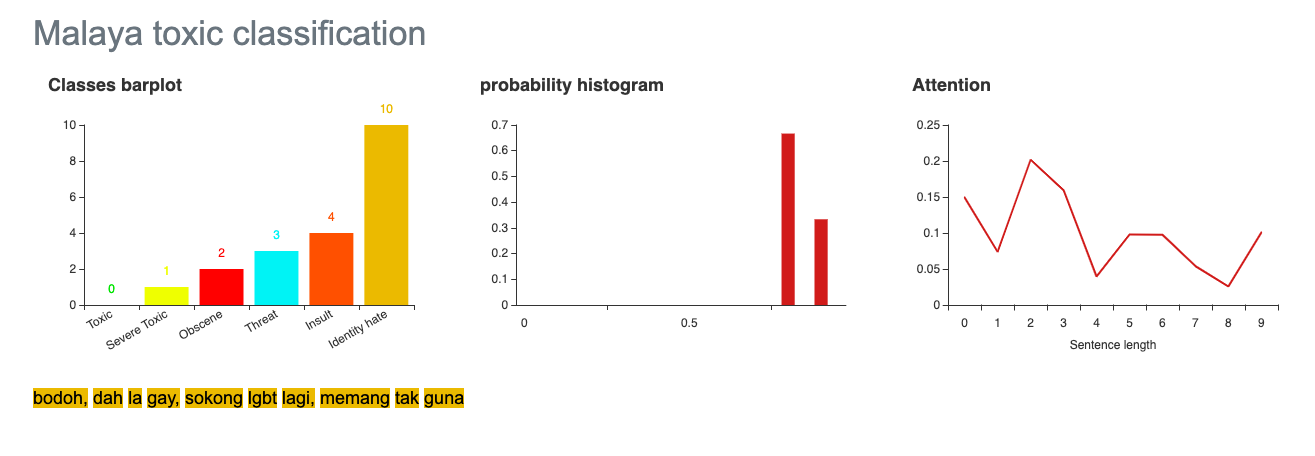

In [19]:
from IPython.core.display import Image, display

display(Image('bert-toxic.png', width=800))

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [5]:
albert = malaya.toxic.transformer(model = 'albert', size = 'base')

In [6]:
malaya.stack.predict_stack([model, albert], another_string)

[{'toxic': 0.9786964,
  'severe_toxic': 0.12929387,
  'obscene': 0.7359074,
  'threat': 0.0023469785,
  'insult': 0.7357025,
  'identity_hate': 0.7726631}]